In [1]:
import xarray as xr

data = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_01_mon_198012-208011 (1).nc")

In [2]:
data

<xarray.Dataset>
Dimensions:                       (ensemble_member: 1, time: 1200,
                                   projection_y_coordinate: 112,
                                   projection_x_coordinate: 82, bnds: 2)
Coordinates:
  * ensemble_member               (ensemble_member) int32 1
  * time                          (time) object 1980-12-16 00:00:00 ... 2080-...
  * projection_y_coordinate       (projection_y_coordinate) float64 -1.02e+05...
  * projection_x_coordinate       (projection_x_coordinate) float64 -2.1e+05 ...
    ensemble_member_id            (ensemble_member) |S27 ...
    grid_latitude                 (projection_y_coordinate, projection_x_coordinate) float64 ...
    grid_longitude                (projection_y_coordinate, projection_x_coordinate) float64 ...
    month_number                  (time) int32 ...
    year                          (time) int32 ...
    yyyymm                        (time) |S64 ...
Dimensions without coordinates: bnds
Data variables:
    tas                           (ensemble_member, time, projection_y_coordinate, projection_x_coordinate) float32 ...
    transverse_mercator           int32 ...
    time_bnds                     (time, bnds) object ...
    projection_y_coordinate_bnds  (projection_y_coordinate, bnds) float64 ...
    projection_x_coordinate_bnds  (projection_x_coordinate, bnds) float64 ...
Attributes: (12/15)
    collection:      land-rcm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2019-07-31T00:00
    domain:          uk
    frequency:       mon
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      12km
    scenario:        rcp85
    source:          UKCP18 regional realisation from a set of 12 limited-are...
    title:           UKCP18 land projections - 12km regional climate model, m...
    version:         v20190731
    Conventions:     CF-1.5

In [3]:
print(data.time)
print(data.tas)

<xarray.DataArray 'time' (time: 1200)>
array([cftime.Datetime360Day(1980, 12, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 1, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 2, 16, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.Datetime360Day(2080, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2080, 10, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2080, 11, 16, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time          (time) object 1980-12-16 00:00:00 ... 2080-11-16 00:00:00
    month_number  (time) int32 ...
    year          (time) int32 ...
    yyyymm        (time) |S64 ...
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
<xarray.DataArray 'tas' (ensemble_member: 1, time: 1200,
                         projection_y_coordinate: 112,
                         projection_x_coordinate: 82)>
[11020800 values with dtype=float

In [4]:
data.coords

Coordinates:
  * ensemble_member          (ensemble_member) int32 1
  * time                     (time) object 1980-12-16 00:00:00 ... 2080-11-16...
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
    ensemble_member_id       (ensemble_member) |S27 ...
    grid_latitude            (projection_y_coordinate, projection_x_coordinate) float64 ...
    grid_longitude           (projection_y_coordinate, projection_x_coordinate) float64 ...
    month_number             (time) int32 ...
    year                     (time) int32 ...
    yyyymm                   (time) |S64 ...

In [12]:
lons = data.variables['projection_x_coordinate'][:]
lats = data.variables['projection_y_coordinate'][:]

print(lats)
print(lons)

<xarray.IndexVariable 'projection_y_coordinate' (projection_y_coordinate: 112)>
array([-102000.,  -90000.,  -78000.,  -66000.,  -54000.,  -42000.,  -30000.,
        -18000.,   -6000.,    6000.,   18000.,   30000.,   42000.,   54000.,
         66000.,   78000.,   90000.,  102000.,  114000.,  126000.,  138000.,
        150000.,  162000.,  174000.,  186000.,  198000.,  210000.,  222000.,
        234000.,  246000.,  258000.,  270000.,  282000.,  294000.,  306000.,
        318000.,  330000.,  342000.,  354000.,  366000.,  378000.,  390000.,
        402000.,  414000.,  426000.,  438000.,  450000.,  462000.,  474000.,
        486000.,  498000.,  510000.,  522000.,  534000.,  546000.,  558000.,
        570000.,  582000.,  594000.,  606000.,  618000.,  630000.,  642000.,
        654000.,  666000.,  678000.,  690000.,  702000.,  714000.,  726000.,
        738000.,  750000.,  762000.,  774000.,  786000.,  798000.,  810000.,
        822000.,  834000.,  846000.,  858000.,  870000.,  882000.,  89400

In [15]:
print(lons.min(), lons.max(), lats.min(), lats.max())  

<xarray.Variable ()>
array(-210000.) <xarray.Variable ()>
array(762000.) <xarray.Variable ()>
array(-102000.) <xarray.Variable ()>
array(1230000.)


# 01

## 1980

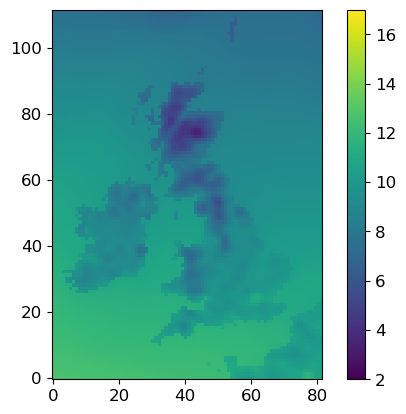

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp = np.array(data['tas'])
temp = temp.squeeze()

# Use block_reduce to average over each block of 12 months
temp_reduced = block_reduce(temp, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced[0], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

## 2080

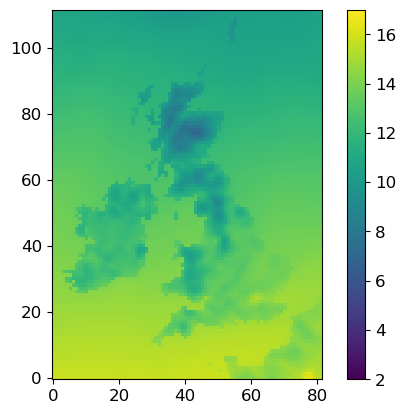

In [43]:
import numpy as np
import matplotlib.pyplot as plt  

plt.imshow(temp_reduced[99], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

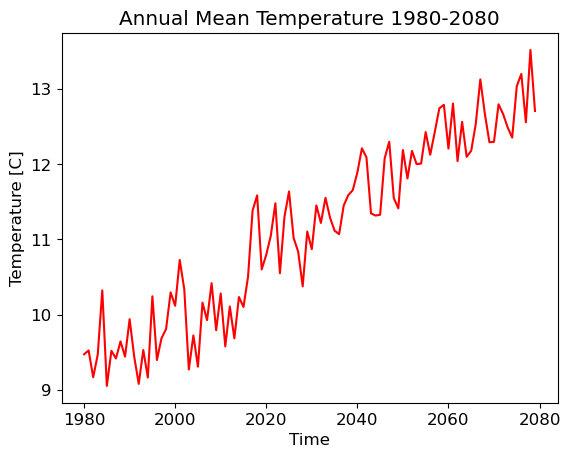

In [45]:
from skimage.measure import block_reduce

# Use block_reduce to average over each block of 12 months
temp_reduced = block_reduce(temp, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp))

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean = np.nanmean(temp_reduced, axis=(1, 2))

time = np.arange(1980,2080)
# Plotting
plt.plot(time, temp_annual_mean, 'r')
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Temperature 1980-2080')
plt.rcParams.update({'font.size': 12})
plt.show()

# 04

In [51]:
import xarray as xr

data04 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_04_mon_198012-208011 (1).nc")

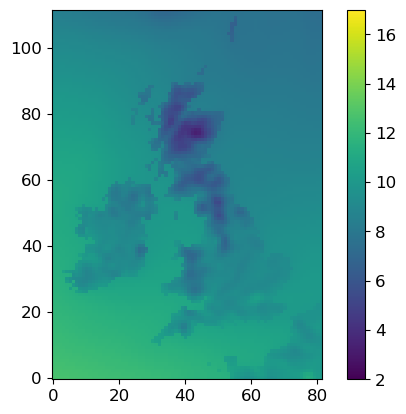

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp04 = np.array(data04['tas'])
temp04 = temp04.squeeze()

# Use block_reduce to average over each block of 12 months
temp_reduced04 = block_reduce(temp04, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp04))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced04[0], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

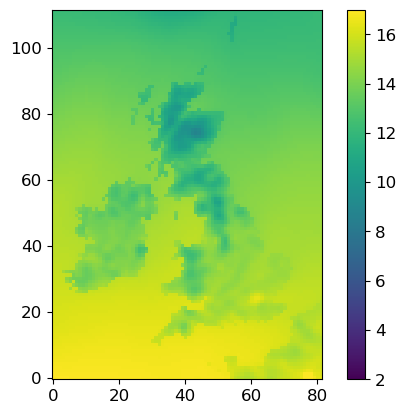

In [53]:
import numpy as np
import matplotlib.pyplot as plt  

plt.imshow(temp_reduced04[99], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

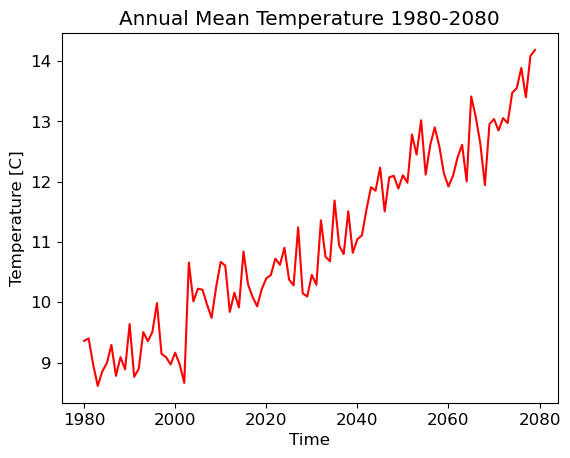

In [54]:
from skimage.measure import block_reduce

# Use block_reduce to average over each block of 12 months
temp_reduced04 = block_reduce(temp04, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp04))

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean04 = np.nanmean(temp_reduced04, axis=(1, 2))

time = np.arange(1980,2080)
# Plotting
plt.plot(time, temp_annual_mean04, 'r')
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Temperature 1980-2080')
plt.rcParams.update({'font.size': 12})
plt.show()

# 07

In [57]:
data07 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_07_mon_198012-208011.nc")

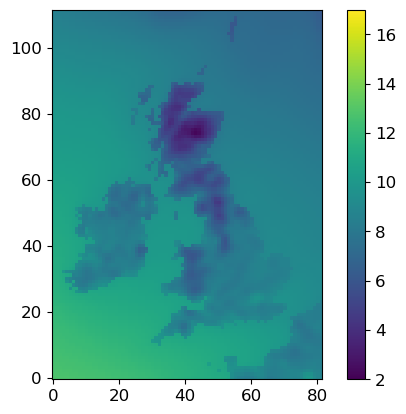

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp07 = np.array(data07['tas'])
temp07 = temp07.squeeze()

# Use block_reduce to average over each block of 12 months
temp_reduced07 = block_reduce(temp07, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp07))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced07[0], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

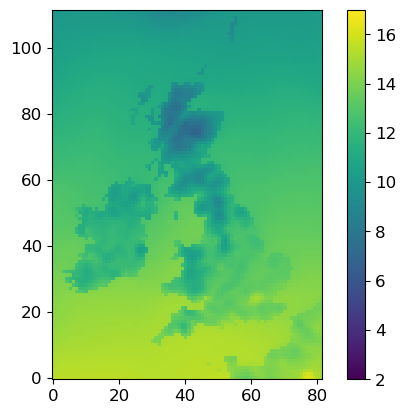

In [59]:
plt.imshow(temp_reduced07[99], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

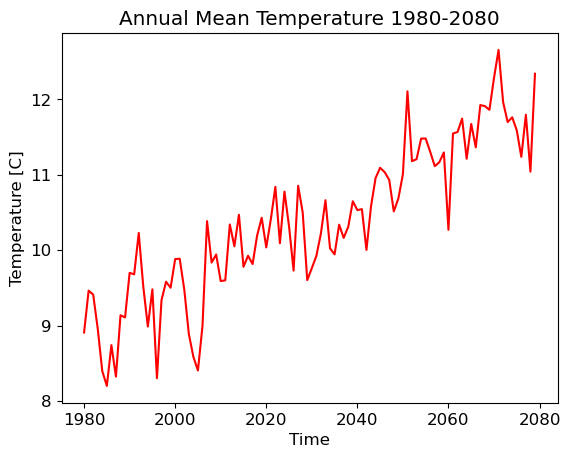

In [60]:
from skimage.measure import block_reduce

# Use block_reduce to average over each block of 12 months
temp_reduced07 = block_reduce(temp07, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp07))

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean07 = np.nanmean(temp_reduced07, axis=(1, 2))

time = np.arange(1980,2080)
# Plotting
plt.plot(time, temp_annual_mean07, 'r')
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Temperature 1980-2080')
plt.rcParams.update({'font.size': 12})
plt.show()

# 09

In [61]:
data09 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_09_mon_198012-208011.nc")

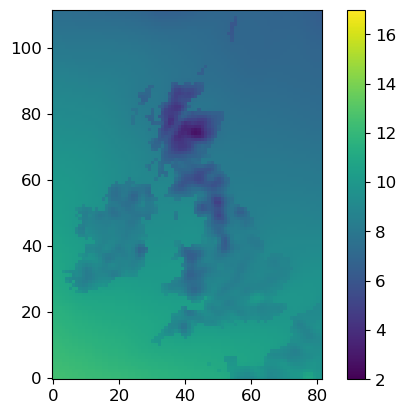

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp09 = np.array(data09['tas'])
temp09 = temp09.squeeze()

# Use block_reduce to average over each block of 12 months
temp_reduced09 = block_reduce(temp09, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp09))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced09[0], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

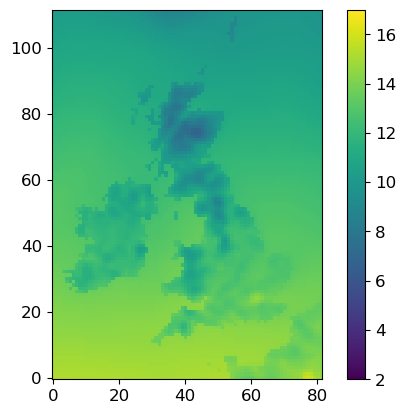

In [63]:
plt.imshow(temp_reduced09[99], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

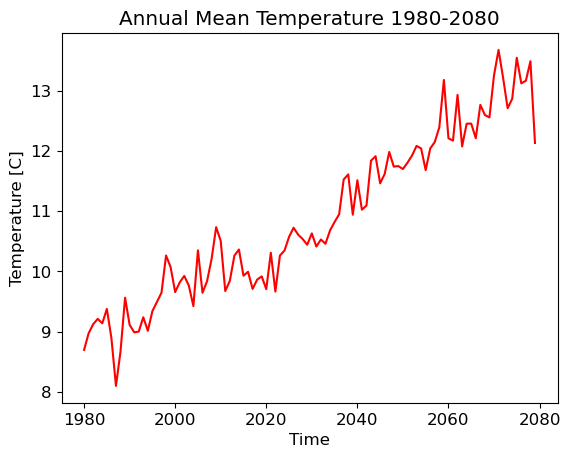

In [64]:
from skimage.measure import block_reduce

# Use block_reduce to average over each block of 12 months
temp_reduced09 = block_reduce(temp09, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp09))

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean09 = np.nanmean(temp_reduced09, axis=(1, 2))

time = np.arange(1980,2080)
# Plotting
plt.plot(time, temp_annual_mean09, 'r')
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Temperature 1980-2080')
plt.rcParams.update({'font.size': 12})
plt.show()

# 12

In [65]:
data12 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_12_mon_198012-208011.nc")

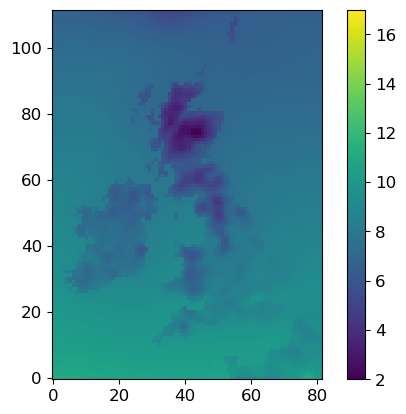

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp12 = np.array(data12['tas'])
temp12 = temp12.squeeze()

# Use block_reduce to average over each block of 12 months
temp_reduced12 = block_reduce(temp12, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp12))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced12[0], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

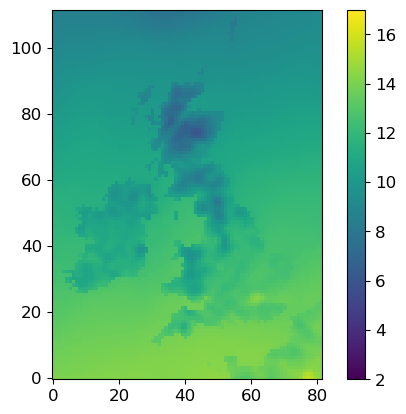

In [67]:
plt.imshow(temp_reduced12[99], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

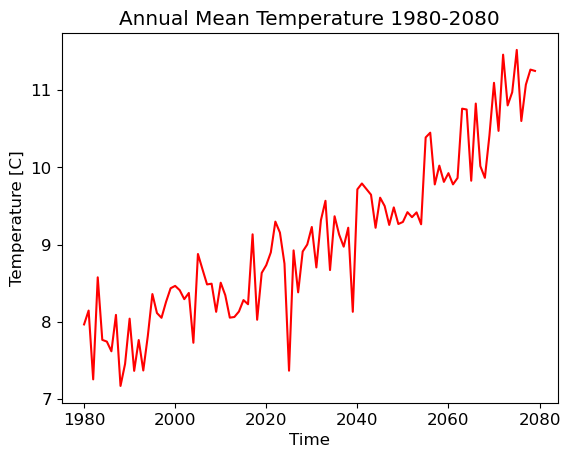

In [68]:
from skimage.measure import block_reduce

# Use block_reduce to average over each block of 12 months
temp_reduced12 = block_reduce(temp12, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp12))

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean12 = np.nanmean(temp_reduced12, axis=(1, 2))

time = np.arange(1980,2080)
# Plotting
plt.plot(time, temp_annual_mean12, 'r')
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Temperature 1980-2080')
plt.rcParams.update({'font.size': 12})
plt.show()

# 15

In [71]:
data15 = xr.open_dataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\UKCP18_data\tas_rcp85_land-rcm_uk_12km_15_mon_198012-208011 (1).nc")

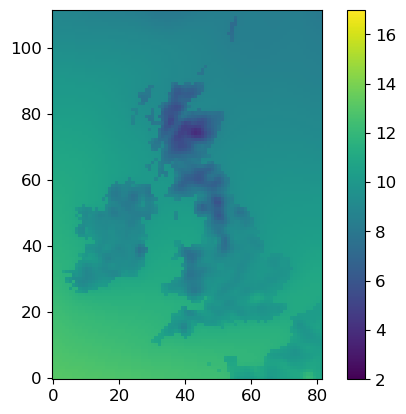

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp15 = np.array(data15['tas'])
temp15 = temp15.squeeze()

# Use block_reduce to average over each block of 12 months
temp_reduced15 = block_reduce(temp15, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp15))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced15[0], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

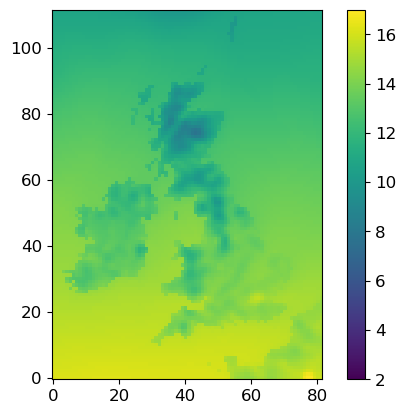

In [73]:
plt.imshow(temp_reduced15[99], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

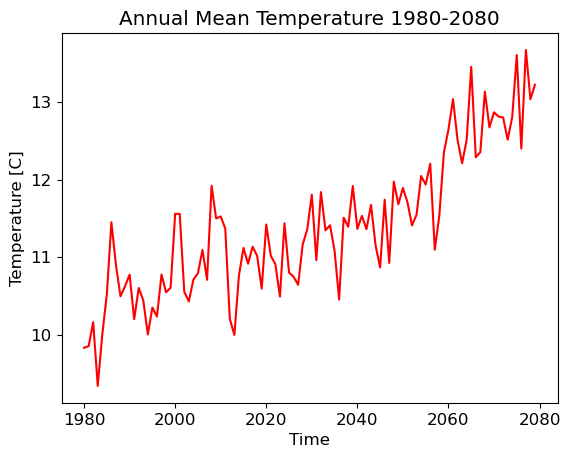

In [74]:
from skimage.measure import block_reduce

# Use block_reduce to average over each block of 12 months
temp_reduced15 = block_reduce(temp15, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp15))

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean15 = np.nanmean(temp_reduced15, axis=(1, 2))

time = np.arange(1980,2080)
# Plotting
plt.plot(time, temp_annual_mean15, 'r')
plt.xlabel('Time')
plt.ylabel('Temperature [C]')
plt.title('Annual Mean Temperature 1980-2080')
plt.rcParams.update({'font.size': 12})
plt.show()

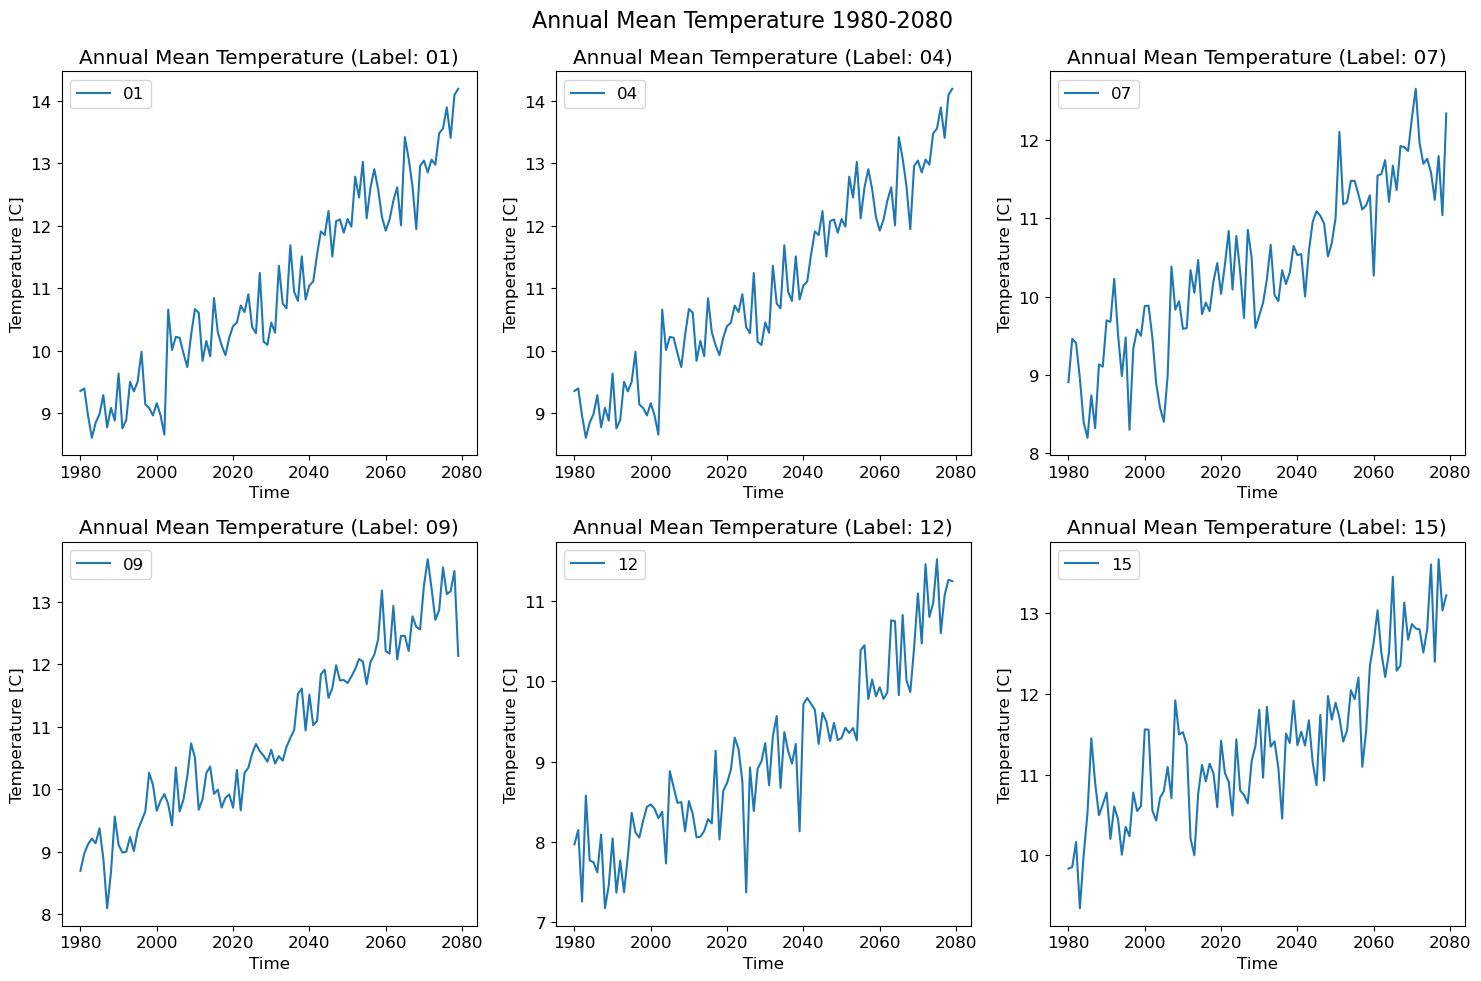

In [76]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust number of rows/columns as needed

# Data for each subplot (adjust as necessary)
data = [temp_annual_mean, temp_annual_mean04, temp_annual_mean07, 
        temp_annual_mean09, temp_annual_mean12, temp_annual_mean15]
labels = ['01', '04', '07', '09', '12', '15']

# Iterate over subplots and plot data
for ax, data_series, label in zip(axes.flat, data, labels):
    ax.plot(time, data_series, label=label)
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature [C]')
    ax.set_title(f'Annual Mean Temperature (Label: {label})')  
    ax.legend(loc='upper left')

#  Overall title 
fig.suptitle('Annual Mean Temperature 1980-2080', fontsize=16) 

plt.rcParams.update({'font.size': 12}) 
plt.tight_layout()  # Adjust spacing to prevent labels overlapping 
plt.show()

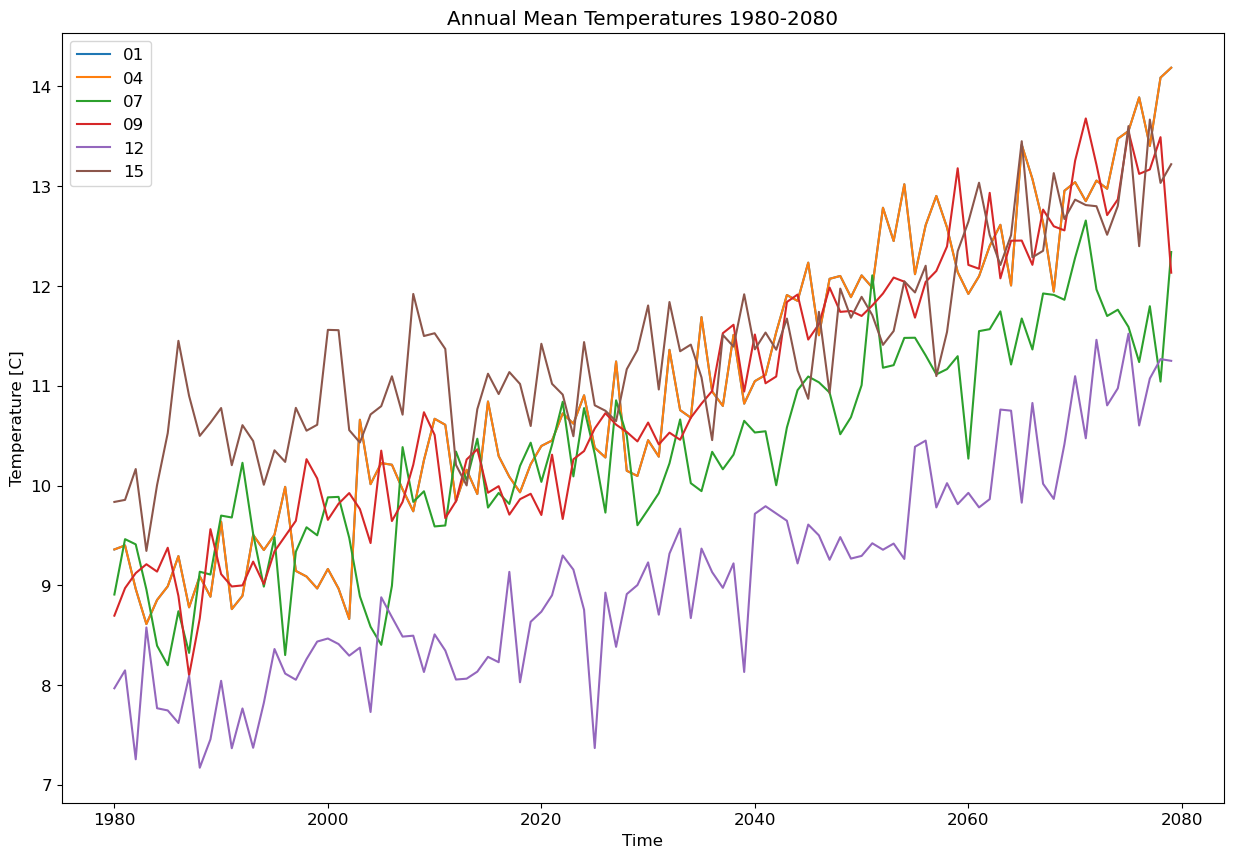

In [77]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create figure and axes

# Assuming your data is in variables as before
data = [temp_annual_mean, temp_annual_mean04, temp_annual_mean07, 
        temp_annual_mean09, temp_annual_mean12, temp_annual_mean15]
labels = ['01', '04', '07', '09', '12', '15']

# Plot each data series
for data_series, label in zip(data, labels):
    ax.plot(time, data_series, label=label)

# Set labels, title, legend
ax.set_xlabel('Time')
ax.set_ylabel('Temperature [C]')
ax.set_title('Annual Mean Temperatures 1980-2080') 
ax.legend(loc='upper left')

plt.rcParams.update({'font.size': 12}) 
plt.show()

# True Values

In [78]:
data_temp = xr.open_mfdataset(r"C:\Users\iarla\OneDrive\Documents\MSc_Project\HadUK_data\12km_Month_Temp\*.nc", parallel=True)

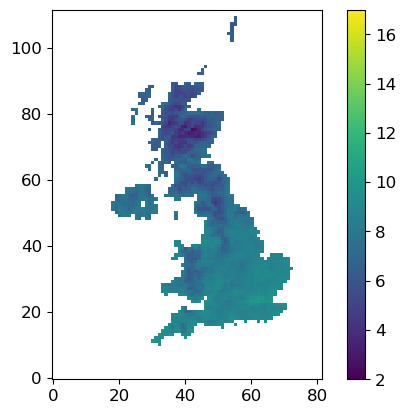

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

# Create some sample data
temp_true = np.array(data_temp['tas'])


# Use block_reduce to average over each block of 12 months
temp_reduced_true = block_reduce(temp_true, block_size=(12, 1, 1), func=np.mean, cval=np.mean(temp_true))


vmin = 2
vmax = 17  

plt.imshow(temp_reduced_true[95], cmap='viridis', origin='lower', vmin=vmin, vmax=vmax) 
plt.colorbar()
plt.show()

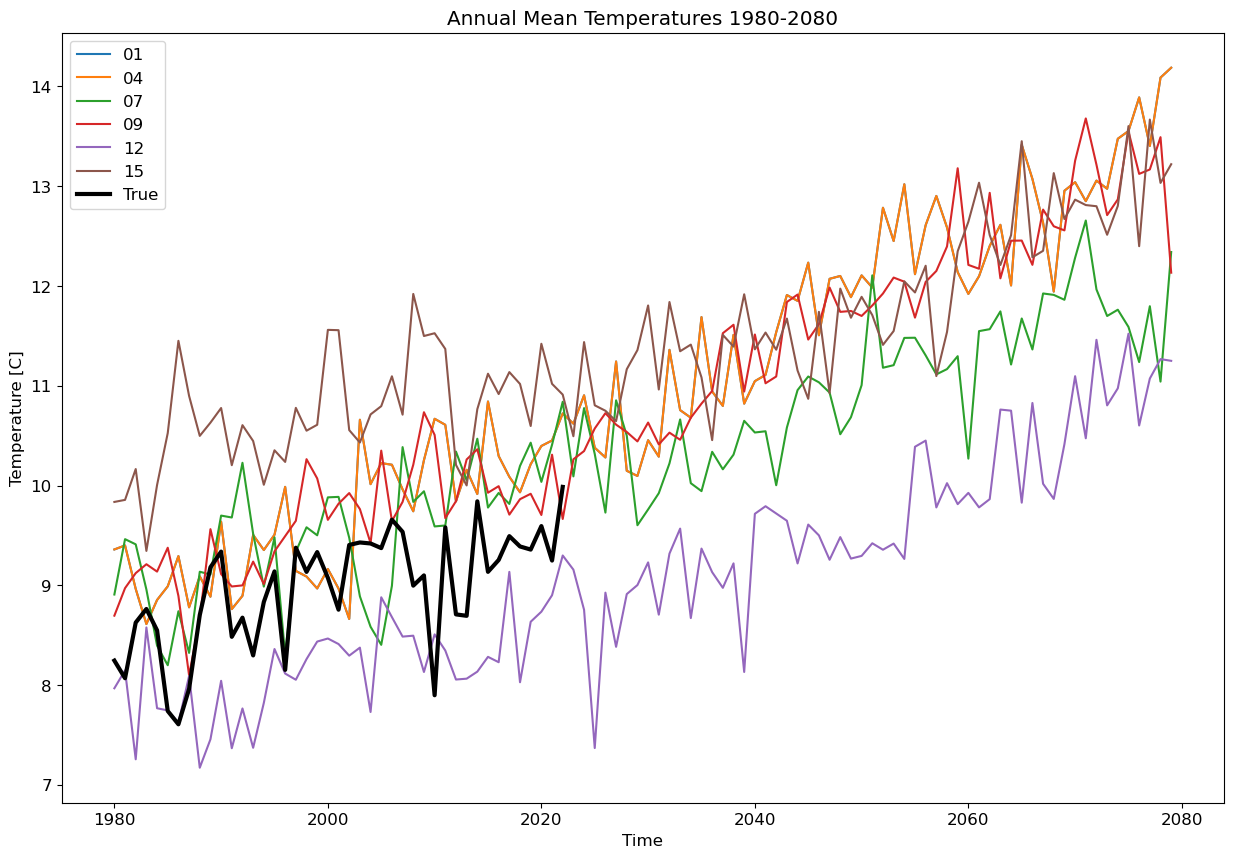

In [87]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create figure and axes
time_true = np.arange(1980,2023)
time = np.arange(1980,2080)

# Calculate the annual mean temperature by averaging over all coordinates
temp_annual_mean_true = np.nanmean(temp_reduced_true, axis=(1, 2))

# Assuming your data is in variables as before
data = [temp_annual_mean, temp_annual_mean04, temp_annual_mean07, 
        temp_annual_mean09, temp_annual_mean12, temp_annual_mean15]
labels = ['01', '04', '07', '09', '12', '15']

# Plot each data series
for data_series, label in zip(data, labels):
    ax.plot(time, data_series, label=label)
    
ax.plot(time_true, temp_annual_mean_true[96:], label='True', linewidth=3, color='black')
# Set labels, title, legend
ax.set_xlabel('Time')
ax.set_ylabel('Temperature [C]')
ax.set_title('Annual Mean Temperatures 1980-2080') 
ax.legend(loc='upper left')

plt.rcParams.update({'font.size': 12}) 
plt.show()